In [ ]:
#Cell Number 1

#Mount google drive to access dataset from google drive
 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cell Number 2

#Import Libraries
 
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from tqdm import tqdm
import scipy.io
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import *
from keras.models import *
from keras.optimizers import *
import sys
import os
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input, merge, concatenate
from keras.preprocessing.image import  img_to_array, array_to_img, load_img
from keras_preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam



In [ ]:
#model
#def trainModel(x_train, y_train, x_test, y_test, modelName, isTraining = False, weights_path = None):
def trainModel(x_train, y_train,modelName, isTraining = False, weights_path = None):
  model = Sequential()
  img_shape = (256, 256, 1)
  model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=img_shape, padding="same"))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.35))
  model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
  model.add(BatchNormalization(momentum=0.8))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.35))
  model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
  model.add(BatchNormalization(momentum=0.8))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.35))
  model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))
  model.add(BatchNormalization(momentum=0.8))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.35))

  model.add(Conv2D(512, kernel_size=3, strides=2, padding="same"))
  model.add(BatchNormalization(momentum=0.8))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.35))

  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  #model.summary()
  model.compile(optimizer= Adam(lr=0.001/100), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
  if not weights_path == None:
    model.load_weights(weights_path)

  if isTraining:
    mcp_save = ModelCheckpoint(filepath= '/content/drive/My Drive/EEG_data_80%train_20%test_split/CNN-80-20/'+modelName+'.h5', save_best_only=True,save_weights_only=True)
    #model.fit(x=x_train,y=y_train, epochs=5,validation_data=(x_test, y_test),batch_size=32)
    history=model.fit(x=x_train,y=y_train, epochs=15,validation_split=0.05,batch_size=20,callbacks=[mcp_save])
    model.save(modelName)
  #model.fit(x=x_train,y=y_train, epochs=10,batch_size=32)
  #model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
  #                    steps_per_epoch=len(x_train) / 32, epochs=10)

  # image_index = 4
  # plt.imshow(y_test[image_index])
  # plt.show()
  # plt.imshow(y_train[image_index])
  # plt.show()
  # pred = model.predict(x_test[image_index])
  # #plt.imshow(pred.reshape(256, 256))
  # plt.show()
  #    X_train=x

  #np.save('test3.npy', X_train) 
  #np.save('100_output.npy', X_train)
  return history, model



In [ ]:
#Cell Number 3

#Resnet_model
#Execute this cell to load Resnet model
 
#from keras.applications.resnet50 import ResNet50
#from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten

#base_model = ResNet50(input_shape =  ((256,256,1)), include_top = False, weights = None)


In [ ]:
#Cell Number 4

#Here few ending layers and previously loaded resnet model are joined
 
#def trainModel(x_train, y_train,modelName, isTraining = False, weights_path = None):
  #model = Sequential()
  #model.add(base_model)
  #model.add(GlobalAveragePooling2D())
  #model.add(Dropout(0.25))
  #model.add(Dense(1, activation='sigmoid'))
  #model.summary()
#model compilation
 
  #model.compile(optimizer=Adam(lr=0.001/100), loss='binary_crossentropy', metrics=['accuracy'])
  #model.compile(optimizer=SGD(lr=0.001/100), loss='binary_crossentropy', metrics=['accuracy'])
  #if not weights_path == None:model.load_weights(weights_path)
 
#input data is given and training the model and saving the best weights
 
  #if isTraining:
    #checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  
    #mcp_save = ModelCheckpoint(filepath= '/content/drive/My Drive/EEG_data_80%train_20%test_split/model_training_80%_testing_20%_10epoches_resnet/'+modelName+'.h5', save_best_only=True,save_weights_only=True)
    #model.fit(x=x_train,y=y_train, epochs=5,validation_split=0.05,batch_size=20,callbacks=[mcp_save])
    #y_pred=model.predict(x_test)
    #pred = np.where(y_pred>0.5,1,0)
    #cm1 = confusion_matrix(y_test,pred)
    #total1=sum(sum(cm1)) 
    #print('Confusion Matrix : \n', cm1)
    #accuracy1=(cm1[0,0]+cm1[1,1])/total1
    #print ('Accuracy : ', accuracy1)
    #sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    #print('Sensitivity : ', sensitivity1 )
    #specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  #print('Specificity : ', specificity1)

  #return model


In [ ]:
img_rows, img_cols= 256,256
channels=1
img_shape = (img_rows, img_cols, channels)
Normal= np.load("/content/drive/My Drive/EEG_data_80%train_20%test_split/EEG_xmb.npy")
Seizure= np.load ("/content/drive/My Drive/EEG_data_80%train_20%test_split/EEG_y.npy")
print(Normal.shape)
print(Seizure.shape)
x_train, x_test, y_train, y_test = train_test_split(Normal,Seizure, test_size=0.2, shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

(7307, 256, 256, 1)
(7307,)
(5845, 256, 256, 1)
(1462, 256, 256, 1)
(5845,)
(1462,)


In [ ]:
cd 

/root


In [ ]:
base_path = '/content/drive/My Drive/EEG_data_80%train_20%test_split'
if not os.path.exists(os.path.join(base_path, 'CNN-80-20')):
  os.mkdir(os.path.join(base_path, 'CNN-80-20'))
#trainModel(x_train, y_train, np.load(os.path.join(base_path, 'x_files', i)), np.load(os.path.join(base_path, 'y_files', i.replace('x', 'y'))), os.path.join(base_path, 'model_10epoches_resnet',i[:-6]), True)
history, model=trainModel(x_train, y_train,modelName='CNN_80-20-model3', isTraining=True)# os.path.join(base_path, 'model_training_80%_testing_20%_10epoches_resnet',i[:-6]), True))



Epoch 1/15
278/278 [==============================] - 9s 33ms/step - loss: 0.0756 - accuracy: 0.9793 - val_loss: 0.4622 - val_accuracy: 0.8294
Epoch 2/15
278/278 [==============================] - 9s 31ms/step - loss: 0.0059 - accuracy: 0.9998 - val_loss: 0.3036 - val_accuracy: 0.9625
Epoch 3/15
278/278 [==============================] - 9s 33ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.2250 - val_accuracy: 0.9727
Epoch 4/15
278/278 [==============================] - 9s 32ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.2611 - val_accuracy: 0.9659
Epoch 5/15
278/278 [==============================] - 9s 34ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1953 - val_accuracy: 0.9727
Epoch 6/15
278/278 [==============================] - 9s 33ms/step - loss: 8.2459e-04 - accuracy: 1.0000 - val_loss: 0.1516 - val_accuracy: 0.9727
Epoch 7/15
278/278 [==============================] - 9s 33ms/step - loss: 7.1729e-04 - accuracy: 1.0000 - val_loss: 0.2668 - val_accuracy

In [ ]:
#model = Sequential()
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dropout(0.5))
#model.add(Dense(1, activation='sigmoid'))
#model.summary()
#model compilation
 
model.compile(optimizer=Adam(lr=0.001/100), loss='binary_crossentropy', metrics=['accuracy'])
model.load_weights('/content/drive/My Drive/EEG_data_80%train_20%test_split/CNN-80-20/CNN_80-20-model.h5')
y_pred=model.predict(x_test)
pred = np.where(y_pred>0.5,1,0)
cm1 = confusion_matrix(y_test,pred)
total1=sum(sum(cm1)) 
print('Confusion Matrix : \n', cm1)
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1089    3]
 [   0  370]]
Accuracy :  0.9979480164158687
Sensitivity :  0.9972527472527473
Specificity :  1.0


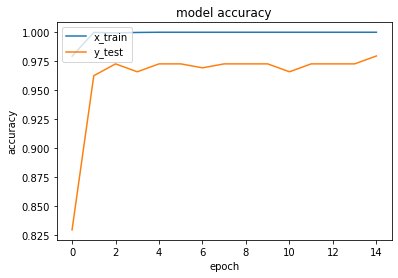

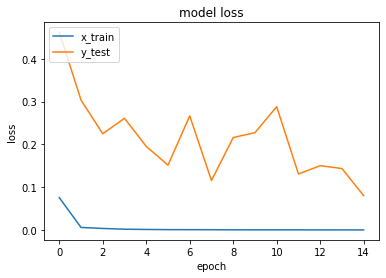

In [ ]:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['x_train', 'y_test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['x_train', 'y_test'], loc='upper left')
    plt.show()

In [ ]:
#Cell Number 5

#training_all_patients
 
#base path for data, labels, and for saving best weights is give in next line.
 
 
base_path = '/content/drive/My Drive/numpyfiles_org_Asad_resnet'
 
 
#accessing the data files which are named as "x_files" in next line
 
 
files_name = [x for x in sorted(os.listdir(os.path.join(base_path, 'x_files'))) if x[-4:] == '.npy']
 
#accessing or creating directory for saving best weights 
 
if not os.path.exists(os.path.join(base_path, 'model_10epoches_resnet')):
  os.mkdir(os.path.join(base_path, 'model_10epoches_resnet'))
 
 
#accessing and loading the data files from directory "x_files"and labels from directory named as "y_files"
 for i in files_name:
  x_train = []
  y_train = []
  for j in files_name:
    if os.path.exists(os.path.join(base_path, 'y_files', i.replace('x', 'y'))) and (not i in j):
      x_train.extend(np.load(os.path.join(base_path, 'x_files', j)))
      y_train.extend(np.load(os.path.join(base_path, 'y_files', j.replace('x', 'y'))))
 #converting the loaded data into numpy array   
  x_train = np.asarray(x_train)
  y_train = np.asarray(y_train)
#printing the model number under training
  print('\n\n\n Training Model',i)
#passing the data to model for training
#x_train as training data
#y_train as training data labels
#"np.load(os.path.join(base_path, 'x_files', i))" as validating data
#"np.load(os.path.join(base_path, 'y_files', i))" as validating data labels
#"os.path.join(base_path, 'model_10_1epoches_resnet',i[:-6]), True" giving the path and directory where to save best weights
  trainModel(x_train, y_train, np.load(os.path.join(base_path, 'x_files', i)), np.load(os.path.join(base_path, 'y_files', i.replace('x', 'y'))), os.path.join(base_path, 'model_10epoches_resnet',i[:-6]), True)





IndentationError: ignored

In [ ]:
#Cell Number 6


#confusion_matrix_for_single_model
 
 	
 
 
base_path = '/content/drive/My Drive/numpyfiles_org_Asad_resnet'
files_name = [x for x in sorted(os.listdir(os.path.join(base_path, 'x_files'))) if x[-4:] == '.npy']
#giving the patient Number to load its data, labels and its saved model 
patient = 'patient27'
x_test = []
y_test = []
x_test.extend(np.load(os.path.join(base_path, 'x_files', patient+'_x.npy')))
y_test.extend(np.load(os.path.join(base_path, 'y_files', patient+'_y.npy')))
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
 
 
model = trainModel(None, None, None, None, 'test', False, weights_path='/content/drive/My Drive/numpyfiles_org_Asad_resnet/model_10epoches_resnet/'+patient +'.h5') 
 
# Here we evaluate model its output is loss and accuracy
 
print(model.evaluate(x_test, y_test))
pred = model.predict(x_test)
pred = np.where(pred>0.5,1,0)
 
#Confusion matrix, Accuracy, sensitivity and specificity
 
 
cm1 = confusion_matrix(y_test,pred)
print('Confusion Matrix : \n', cm1)
 
total1=sum(sum(cm1))
 
#####from confusion matrix calculate accuracy
 
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)
 
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
 
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 8, 8, 2048)        23581440  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,583,489
Trainable params: 23,530,369
Non-trainable params: 53,120
_________________________________________________________________
1/1 [==============================] - 0s 2ms/step - loss: 4.8984e-07 - accuracy: 1.0000
[4.898438987765985e-07, 1.0]
Confusion Matrix : 
 [[ 1  0]
 [ 0 30]]
Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0
